# Importing necessary libraries and initial data manipulation

In [34]:
import pandas as pd 

Read in the data and view the top few data.

In [35]:
df = pd.read_csv('coaster_db.csv')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


Now we see the number of features availabe in the dataset and the data type of each feature.

In [36]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

We see that we have a lot of data, some of which may not be relevant to us. For now, we remove the numeric features that are duplicated (such as Length and Speed) and most of the string/object type of features since those are not useful in numerical analysis. We will keep the Type of roller coaster as we might be interested in different properties of the roller coasters for each type of roller coaster.

In [37]:
subdf = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date', 'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
      # 'Closing date', 'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
      # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
       #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       #'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
subdf

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


We change the opening_date_clean data to a date data type, as that would be easier for us to manipulate and use to group by later on.

In [38]:
subdf['opening_date_clean']

0       1884-06-16
1       1895-01-01
2              NaN
3       1901-01-01
4       1901-01-01
           ...    
1082           NaN
1083    2022-01-01
1084    2016-06-16
1085           NaN
1086    2022-01-01
Name: opening_date_clean, Length: 1087, dtype: object

In [42]:
subdf['opening_date_clean'] = pd.to_datetime(subdf['opening_date_clean'])
subdf['opening_date_clean']

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

We now check the size of the dataset.

In [40]:
subdf.shape

(1087, 13)

We see that the dataset has 1087 observations and 13 features (as seen earlier). We now rename some of the features to more convenient ones before we start our in depth analysis.

In [44]:
subdf.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [49]:
to_rename ={'coaster_name' : 'name','Location' : 'loc', 'Manufacturer' : 'manu', 'year_introduced' : 'year',
            'Type_Main' : 'type', 'opening_date_clean' : 'opening', 'speed_mph' : 'speed',
            'height_ft' : 'height', 'Inversions_clean' : 'inversion', 'Gforce_clean' : 'gforce'}
subdf = subdf.rename(columns=to_rename)
subdf

,name,loc,Status,manu,year,latitude,longitude,type,opening,speed,height,inversion,gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


# Descriptive statistics and null values

We first find the primary descriptive statistical values for the dataset and interpret them.

In [79]:
subdf.describe()

,year,latitude,longitude,opening,speed,height,inversion,gforce
count,990.000000,783.000000,783.000000,807,850.000000,159.000000,990.000000,324.000000
mean,1994.054545,38.375748,-41.591138,1994-09-02 10:13:49.739776896,49.017647,103.994340,1.308081,3.815093
min,1884.000000,-48.261700,-123.035700,1884-06-16 00:00:00,5.000000,13.100000,0.000000,0.800000
25%,1988.000000,35.100350,-85.745650,1987-09-21 00:00:00,37.300000,52.150000,0.000000,3.375000
50%,2000.000000,40.289700,-76.653500,2000-04-29 00:00:00,50.000000,91.900000,0.000000,4.000000
75%,2009.000000,44.799750,2.863400,2010-11-04 00:00:00,58.000000,133.850000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,2022-03-01 00:00:00,149.100000,377.300000,14.000000,12.000000
std,23.872027,15.549452,72.326633,NaN,16.847266,68.293609,2.026876,1.009229


Count means how many data points are availabe for the feature. Since at first we saw that there is supposed to be 1087 observations, and there seems to be fewer count of features, it implies that there are NA values. The mean values represent the arithmatical average of the values of the features. The next three data are the percentiles, which are the statistical measures of how many data are below a certain level. For example, about 50% of the year data are below the year 2000. Max and min just represents the maximum and minimum value the feature attains in the dataset. Std is the standard deviation, which simply means how dispersed the data points on average are from each other.

We try to find the null values in each feature.

In [50]:
subdf.isnull().sum()

name           0
loc            0
Status       213
manu          59
year           0
latitude     275
longitude    275
type           0
opening      250
speed        150
height       916
inversion      0
gforce       725
dtype: int64

As we suspected earlier, there are a lot missing data. Usually it would be wise to fill in the values or impute the records, however, in this case we have a lot of missing values so we can not impute these datas as it would basically render the entire dataset uselss since we will be left with so little amount of observations. 
We try to find the duplicated data and impute these.

In [51]:
subdf.duplicated().sum()

0

We have no exact duplicates, but there might be other form of duplicates, for example an observation could be exactly same as another with a slight change in one of the features. For this reason, we try to find duplicates by matching the name of the roller coaster, since the name of the roller coaster could be safely thought of to be unique.

In [54]:
subdf[subdf.duplicated(subset=['name'])==True]

,name,loc,Status,manu,year,latitude,longitude,type,opening,speed,height,inversion,gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


From the previous analysis we see there are about 97 observations that have the same name as some other observation. To check how closely duplicated these data are, we choose the first name and see the original and the duplicated data.

In [55]:
subdf[subdf['name']=='Crystal Beach Cyclone']

,name,loc,Status,manu,year,latitude,longitude,type,opening,speed,height,inversion,gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


As we suspected, these data are entirely identical, except for the year, which represents the year the roller coaster was introduced. We decide to impute these data. However, removing observations solely based on the name may not be fair, as two roller coasters may have the same name, or a roller coaster could be decommisioned and reopened with the same name but with significant difference in another feature such as the location. So we match three features: the name, the location of the roller coaster, and the opening date. If these three match then we impute these observations.

In [59]:
subdf[subdf.duplicated(subset=['name','loc','opening'])==True]

,name,loc,Status,manu,year,latitude,longitude,type,opening,speed,height,inversion,gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


We impute duplicates and do the original check.

In [66]:
subdf = subdf.loc[~subdf.duplicated(subset=['name','loc','opening'])].reset_index(drop=True).copy()
subdf[subdf['name']=='Crystal Beach Cyclone']

,name,loc,Status,manu,year,latitude,longitude,type,opening,speed,height,inversion,gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


Now there is only one observation under this name, so we our removal was a success.

# In depth analysis

We find how many different years there are, as we will be doing an analysis on which year had the most roller coaster launches.

In [70]:
subdf['year'].unique()

array([1884, 1895, 1896, 1901, 1902, 1904, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1917, 1919, 1920, 1921, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1940,
       1941, 1946, 1950, 1951, 1952, 1955, 1956, 1958, 1959, 1961, 1964,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

We count the number of roller coaster launches in each year.

In [71]:
subdf['year'].value_counts()

year
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

We now do various types of plots.

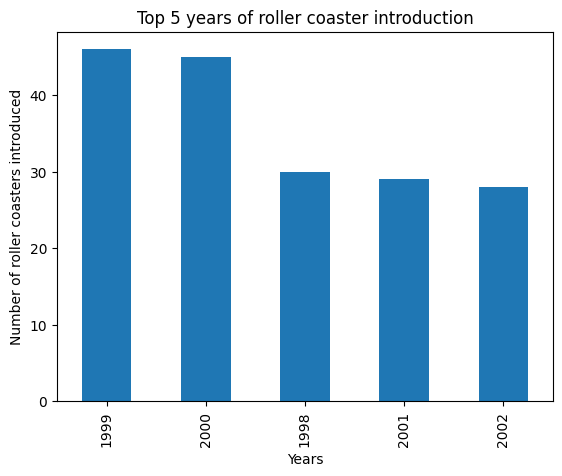

In [74]:
subdf['year'].value_counts().head(5).plot(kind='bar',title='Top 5 years of roller coaster introduction',xlabel='Years',
                                                 ylabel='Number of roller coasters introduced')

We can check the distribution of the speeds.

<Axes: title={'center': 'Distribution of the speed'}, xlabel='Speed', ylabel='Frequency'>

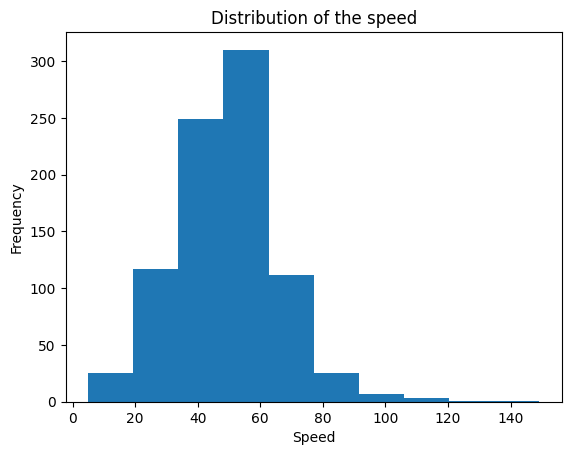

In [78]:
subdf['speed'].plot(kind='hist',title='Distribution of the speed',xlabel='Speed',ylabel='Frequency')

We can also see if the type of material used in making roller coaster has any correlation with the speed it attains.

In [80]:
subdf['type'].value_counts()

type
Steel    728
Wood     191
Other     71
Name: count, dtype: int64

<Axes: title={'center': 'Relationship of types of material and the speed of the roller coaster'}, xlabel='type', ylabel='speed'>

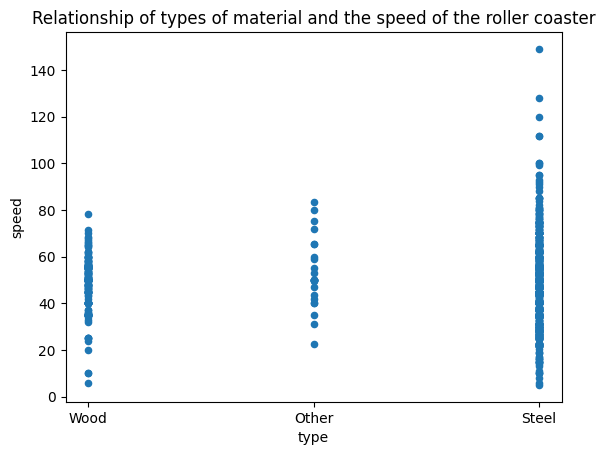

In [86]:
subdf.plot(kind='scatter',y='speed',x='type',title='Relationship between types of material and the speed of the roller coaster')

We see that the maximum speed seem to be attained by the roller coasters made of steel, which would be what is expected. We do a further statistical to see the mean, max, min of each type of roller coaster.

In [89]:
grouped = subdf.groupby('type')['speed'].agg(['sum','mean','max','min'])
grouped

,sum,mean,max,min
type,,,,
Other,1369.3,52.665385,83.3,22.4
Steel,32210.2,49.026180,149.1,5.0
Wood,8085.5,48.416168,78.4,6.0


This shows an interesting information. We would have expected the steel roller coasters to have a higher mean but it actually has a lower mean, not much different from the wood ones. These would imply that the higher speeds of the steel roller coasters may be an outlier. However, to be more sure, we would neet to do a regression analysis, one which we will not be doing here.

Now we see if the height attained by the roller coaster has any relation to its speed.

<Axes: title={'center': 'Height vs Speed'}, xlabel='height', ylabel='speed'>

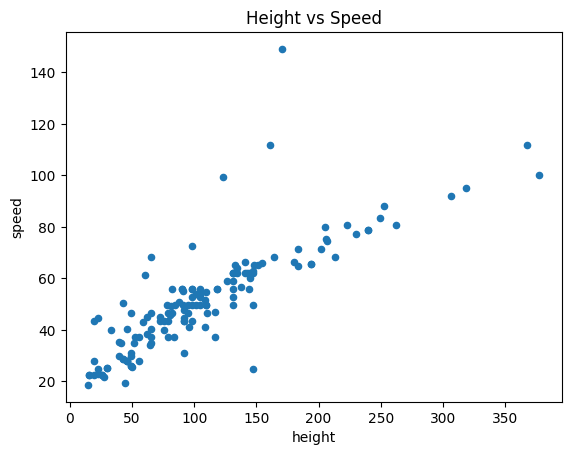

In [90]:
subdf.plot(kind='scatter',x='height',y='speed',title='Height vs Speed')

We see that this is positively related. We do a statistical measure of the other data, such as the year, speed, height, number of inversions of the roller coaster and the gravitational forces to see how all these are related to each other.

In [91]:
df_corr = subdf[['year','speed',
    'height','inversion','gforce']].dropna().corr()
df_corr

,year,speed,height,inversion,gforce
year,1.000000,0.171978,0.135413,-0.209887,0.160247
speed,0.171978,1.000000,0.733999,-0.028705,0.607383
height,0.135413,0.733999,1.000000,-0.079736,0.466482
inversion,-0.209887,-0.028705,-0.079736,1.000000,0.275991
gforce,0.160247,0.607383,0.466482,0.275991,1.000000


Some interesting points: Inversions are somewhat correlated with gravitational forces, so are speed and height. However, one would assume speed has a correlation the inversions, but from what data we have, we see the correlation is very small, so it might not be related after all.